<a href="https://colab.research.google.com/github/adenium18/MLprojects/blob/main/cust_churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
file=files.upload()

Saving Churn_Modelling.csv to Churn_Modelling.csv


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv('Churn_Modelling.csv')

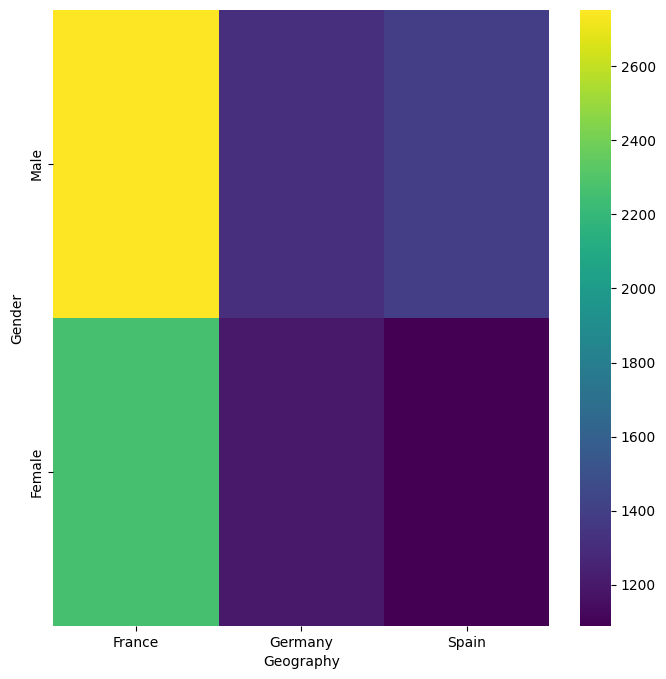

In [ ]:
# @title Geography vs Gender

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Gender'].value_counts()
    for x_label, grp in df.groupby('Geography')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Geography')
_ = plt.ylabel('Gender')

In [ ]:
df.drop(columns=['RowNumber','CustomerId'])

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [ ]:
df.Tenure.unique()

array([ 2,  1,  8,  7,  4,  6,  3, 10,  5,  9,  0])

In [ ]:
df.Surname.nunique()

2932

In [ ]:
df.Geography.unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [ ]:
df.Surname.value_counts()

Surname
Smith       32
Scott       29
Martin      29
Walker      28
Brown       26
            ..
Izmailov     1
Bold         1
Bonham       1
Poninski     1
Burbidge     1
Name: count, Length: 2932, dtype: int64

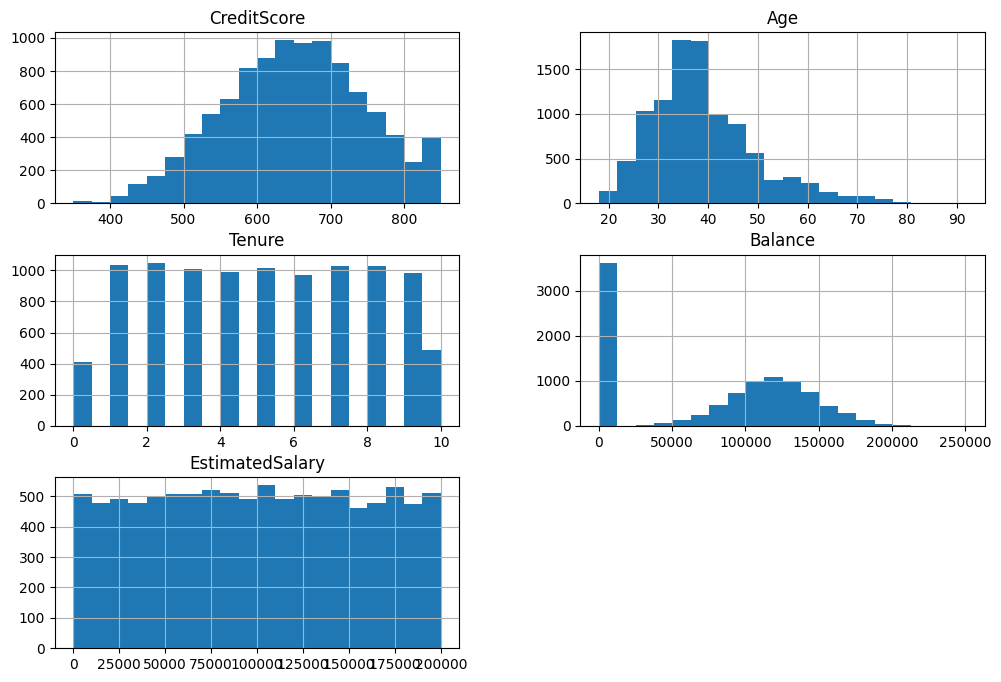

In [ ]:
# Distribution of Numerical Variables
numeric_vars = ['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary']
df[numeric_vars].hist(bins=20, figsize=(12, 8))
plt.show()

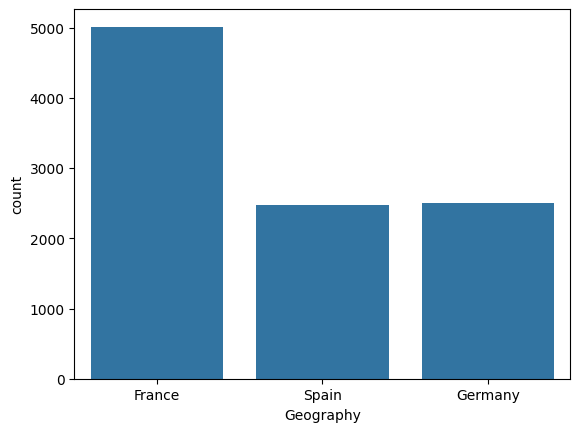

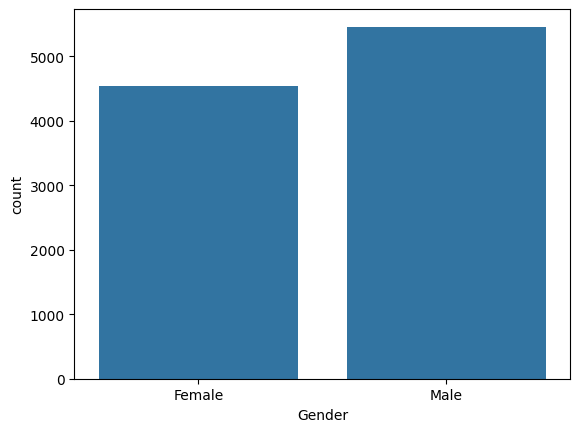

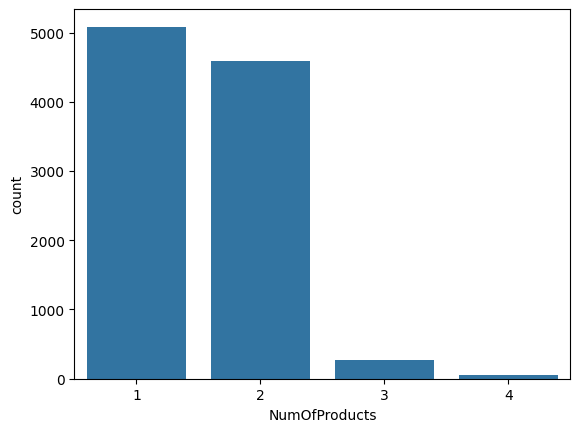

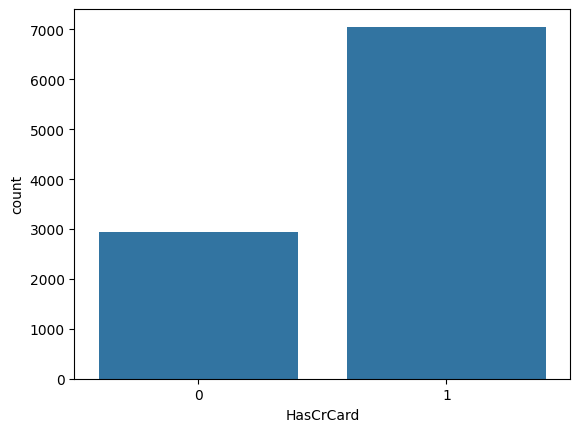

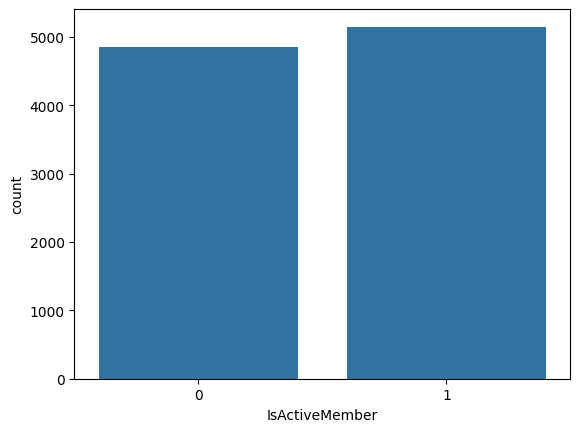

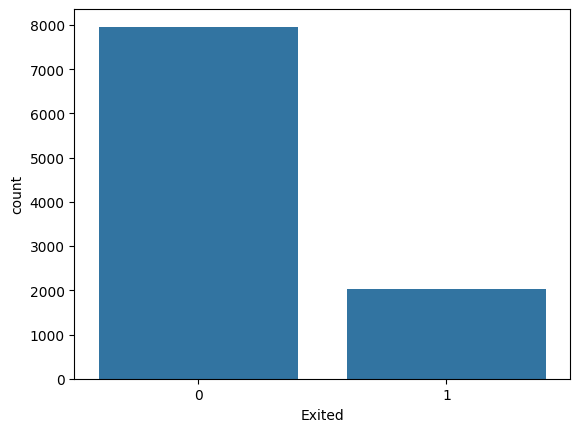

In [ ]:
cat_vars = ['Geography', 'Gender', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'Exited']
for var in cat_vars:
    sns.countplot(x=var, data=df)
    plt.show()

In [ ]:
print(df.isna().sum())

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64


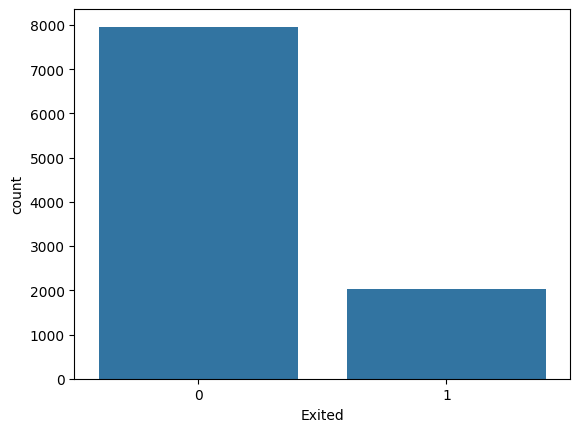

In [ ]:
# Target Variable Analysis
sns.countplot(x='Exited', data=df)
plt.show()

In [ ]:
df.Exited.value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

# feature engineering

In [ ]:
#conversion of surbame coulmn yo numeric value
from sklearn.preprocessing import LabelEncoder

# Create a label encoder object
label_encoder = LabelEncoder()

# Apply label encoding to the 'Surname' column
df['Surname_encoded'] = label_encoder.fit_transform(df['Surname'])

In [ ]:
#categorical columns
cat_columns=['Geography','Gender','HasCrCard','IsActiveMember']

#numerical columns
num_columns = ['CreditScore', 'Age','NumOfProducts','Tenure', 'Balance', 'EstimatedSalary']#surname_encoded removed to check accuracy


In [ ]:
X=df.drop(columns=['Exited','RowNumber','CustomerId'])
y=df['Exited']

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder,StandardScaler,MinMaxScaler

# Create preprocessing pipelines for categorical and numerical data
cat_pipeline = Pipeline([('encoder', OneHotEncoder()) ]) # One-hot encode categorical features


num_pipeline = Pipeline([('scaler', StandardScaler()) ]) # Standardize numerical features


# Combine preprocessing pipelines for categorical and numerical data
preprocessor = ColumnTransformer([
    ('cat', cat_pipeline, cat_columns),
    ('num', num_pipeline, num_columns)
])

X=preprocessor.fit_transform(X)

In [ ]:
X.shape

(10000, 15)

In [ ]:
pd.DataFrame(X)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,-0.326221,0.293517,-0.911583,-1.041760,-1.225848,0.021886
1,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,-0.440036,0.198164,-0.911583,-1.387538,0.117350,0.216534
2,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,-1.536794,0.293517,2.527057,1.032908,1.333053,0.240687
3,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.501521,0.007457,0.807737,-1.387538,-1.225848,-0.108918
4,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,2.063884,0.388871,-0.911583,-1.041760,0.785728,-0.365276
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.246488,0.007457,0.807737,-0.004426,-1.225848,-0.066419
9996,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,-1.391939,-0.373958,-0.911583,1.724464,-0.306379,0.027988
9997,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.604988,-0.278604,-0.911583,0.687130,-1.225848,-1.008643
9998,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.256835,0.293517,0.807737,-0.695982,-0.022608,-0.125231


# train test split

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,random_state=21,test_size=0.25)

In [ ]:
x_train.shape,y_train.shape

((7500, 15), (7500,))

# model fitting

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
lr=LogisticRegression(max_iter=10000)

# Define the hyperparameters grid to search
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization parameter
    'penalty': ['l1', 'l2']  # Penalty term ('l1' for Lasso, 'l2' for Ridge)
}
gscv=GridSearchCV(lr,param_grid,cv=3,verbose=3,return_train_score=True)
gscv.fit(x_train,y_train)

Fitting 3 folds for each of 12 candidates, totalling 36 fits
[CV 1/3] END C=0.001, penalty=l1;, score=(train=nan, test=nan) total time=   0.0s
[CV 2/3] END C=0.001, penalty=l1;, score=(train=nan, test=nan) total time=   0.0s
[CV 3/3] END C=0.001, penalty=l1;, score=(train=nan, test=nan) total time=   0.0s
[CV 1/3] END C=0.001, penalty=l2;, score=(train=0.797, test=0.795) total time=   0.0s
[CV 2/3] END C=0.001, penalty=l2;, score=(train=0.796, test=0.797) total time=   0.0s
[CV 3/3] END C=0.001, penalty=l2;, score=(train=0.796, test=0.797) total time=   0.0s
[CV 1/3] END C=0.01, penalty=l1;, score=(train=nan, test=nan) total time=   0.0s
[CV 2/3] END C=0.01, penalty=l1;, score=(train=nan, test=nan) total time=   0.0s
[CV 3/3] END C=0.01, penalty=l1;, score=(train=nan, test=nan) total time=   0.0s
[CV 1/3] END C=0.01, penalty=l2;, score=(train=0.808, test=0.811) total time=   0.0s
[CV 2/3] END C=0.01, penalty=l2;, score=(train=0.810, test=0.810) total time=   0.0s
[CV 3/3] END C=0.01, p

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
18 fits failed out of a total of 36.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
18 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: Solve

GridSearchCV(cv=3, estimator=LogisticRegression(max_iter=10000),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'penalty': ['l1', 'l2']},
             return_train_score=True, verbose=3)

In [ ]:
pd.DataFrame(gscv.cv_results_, columns=['params','mean_fit_time','mean_test_score','mean_train_score','rank_test_score']).sort_values(by='rank_test_score').set_index('params').head()

,mean_fit_time,mean_test_score,mean_train_score,rank_test_score
params,,,,
"{'C': 0.1, 'penalty': 'l2'}",0.024128,0.812800,0.813267,1
"{'C': 1, 'penalty': 'l2'}",0.016966,0.812267,0.813600,2
"{'C': 10, 'penalty': 'l2'}",0.019709,0.812267,0.813400,2
"{'C': 100, 'penalty': 'l2'}",0.014210,0.812133,0.813400,4
"{'C': 0.01, 'penalty': 'l2'}",0.013340,0.808533,0.810267,5


In [ ]:
gscv.score(x_test,y_test)

0.8036

In [ ]:
gscv.best_params_

{'C': 0.1, 'penalty': 'l2'}

In [ ]:
lr=LogisticRegression(C=1,penalty='l2',solver='liblinear')
lr.fit(x_train,y_train)

LogisticRegression(C=1, solver='liblinear')

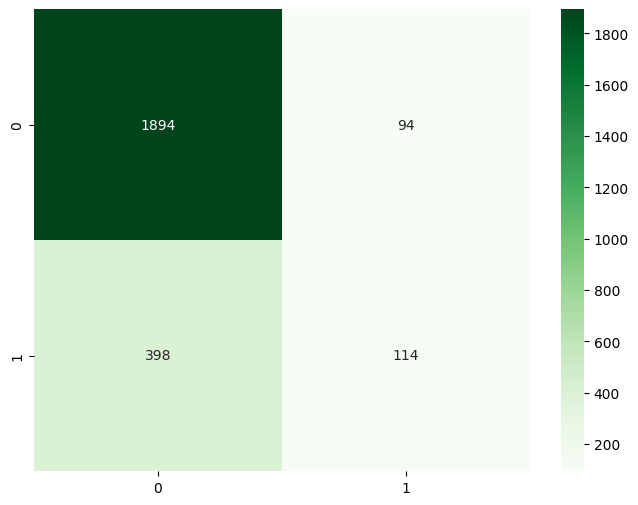

              precision    recall  f1-score   support

           0       0.83      0.95      0.89      1988
           1       0.55      0.22      0.32       512

    accuracy                           0.80      2500
   macro avg       0.69      0.59      0.60      2500
weighted avg       0.77      0.80      0.77      2500



In [ ]:
from sklearn.metrics import confusion_matrix,classification_report

# Assuming y_true and y_pred are your true and predicted labels, respectively
# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, lr.predict(x_test))

# Plot confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Greens')
plt.show()

print(classification_report(y_test,lr.predict(x_test)))

the model logistic regresion is not pefroming weell for 11 values

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(random_state=56)
rf.fit(x_train,y_train)

RandomForestClassifier(random_state=56)

In [ ]:
#lets check with gridsearchcv
rf=RandomForestClassifier()
params={'max_depth':[9,10,11,12,15,14],
      'max_features':[0.2,0.4,0.6,0.8,1],
      'class_weight':['balanced']}
gs_rf=GridSearchCV(rf,params,cv=3,verbose=3,return_train_score=True)
gs_rf.fit(x_train,y_train)

Fitting 3 folds for each of 30 candidates, totalling 90 fits
[CV 1/3] END class_weight=balanced, max_depth=9, max_features=0.2;, score=(train=0.907, test=0.815) total time=   1.4s
[CV 2/3] END class_weight=balanced, max_depth=9, max_features=0.2;, score=(train=0.902, test=0.832) total time=   2.8s
[CV 3/3] END class_weight=balanced, max_depth=9, max_features=0.2;, score=(train=0.901, test=0.834) total time=   0.8s
[CV 1/3] END class_weight=balanced, max_depth=9, max_features=0.4;, score=(train=0.905, test=0.816) total time=   1.3s
[CV 2/3] END class_weight=balanced, max_depth=9, max_features=0.4;, score=(train=0.904, test=0.828) total time=   1.3s
[CV 3/3] END class_weight=balanced, max_depth=9, max_features=0.4;, score=(train=0.909, test=0.852) total time=   1.2s
[CV 1/3] END class_weight=balanced, max_depth=9, max_features=0.6;, score=(train=0.905, test=0.815) total time=   1.6s
[CV 2/3] END class_weight=balanced, max_depth=9, max_features=0.6;, score=(train=0.909, test=0.826) total 

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'class_weight': ['balanced'],
                         'max_depth': [9, 10, 11, 12, 15, 14],
                         'max_features': [0.2, 0.4, 0.6, 0.8, 1]},
             return_train_score=True, verbose=3)

In [ ]:
pd.DataFrame(gs_rf.cv_results_, columns=['params','mean_fit_time','mean_test_score','mean_train_score','rank_test_score']).sort_values(by='rank_test_score').set_index('params').head()

,mean_fit_time,mean_test_score,mean_train_score,rank_test_score
params,,,,
"{'class_weight': 'balanced', 'max_depth': 14, 'max_features': 0.2}",0.623742,0.858000,0.996400,1
"{'class_weight': 'balanced', 'max_depth': 15, 'max_features': 0.4}",0.936936,0.856667,0.998800,2
"{'class_weight': 'balanced', 'max_depth': 14, 'max_features': 0.4}",1.187180,0.855067,0.997000,3
"{'class_weight': 'balanced', 'max_depth': 15, 'max_features': 0.6}",1.495280,0.854000,0.999400,4
"{'class_weight': 'balanced', 'max_depth': 12, 'max_features': 0.4}",0.891633,0.853333,0.980867,5


In [ ]:
gs_rf.best_params_

{'class_weight': 'balanced', 'max_depth': 14, 'max_features': 0.2}

max depth 14 seems to overfit on train data,so try again gridsearch with small value of max_deth


In [ ]:
params={'max_depth':[5,6,7,8],
      'max_features':[0.2,0.4,0.6,0.8,1],
      'class_weight':['balanced']}
gs_rf=GridSearchCV(rf,params,cv=3,verbose=3,return_train_score=True)
gs_rf.fit(x_train,y_train)

Fitting 3 folds for each of 20 candidates, totalling 60 fits
[CV 1/3] END class_weight=balanced, max_depth=5, max_features=0.2;, score=(train=0.816, test=0.787) total time=   0.6s
[CV 2/3] END class_weight=balanced, max_depth=5, max_features=0.2;, score=(train=0.814, test=0.801) total time=   0.6s
[CV 3/3] END class_weight=balanced, max_depth=5, max_features=0.2;, score=(train=0.812, test=0.810) total time=   0.7s
[CV 1/3] END class_weight=balanced, max_depth=5, max_features=0.4;, score=(train=0.819, test=0.790) total time=   0.9s
[CV 2/3] END class_weight=balanced, max_depth=5, max_features=0.4;, score=(train=0.819, test=0.808) total time=   0.9s
[CV 3/3] END class_weight=balanced, max_depth=5, max_features=0.4;, score=(train=0.820, test=0.808) total time=   0.9s
[CV 1/3] END class_weight=balanced, max_depth=5, max_features=0.6;, score=(train=0.822, test=0.790) total time=   1.0s
[CV 2/3] END class_weight=balanced, max_depth=5, max_features=0.6;, score=(train=0.813, test=0.802) total 

GridSearchCV(cv=3,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              max_depth=6, max_features=0.2),
             param_grid={'class_weight': ['balanced'],
                         'max_depth': [5, 6, 7, 8],
                         'max_features': [0.2, 0.4, 0.6, 0.8, 1]},
             return_train_score=True, verbose=3)

In [ ]:
pd.DataFrame(gs_rf.cv_results_, columns=['params','mean_fit_time','mean_test_score','mean_train_score','rank_test_score']).sort_values(by='rank_test_score').set_index('params').head()

,mean_fit_time,mean_test_score,mean_train_score,rank_test_score
params,,,,
"{'class_weight': 'balanced', 'max_depth': 8, 'max_features': 0.2}",0.484895,0.824933,0.877533,1
"{'class_weight': 'balanced', 'max_depth': 8, 'max_features': 0.4}",0.741557,0.822267,0.877400,2
"{'class_weight': 'balanced', 'max_depth': 7, 'max_features': 0.4}",0.683962,0.816400,0.853867,3
"{'class_weight': 'balanced', 'max_depth': 8, 'max_features': 1}",0.347161,0.815867,0.867600,4
"{'class_weight': 'balanced', 'max_depth': 8, 'max_features': 0.6}",1.208986,0.815600,0.875600,5


# randomForestClasiier giving best results

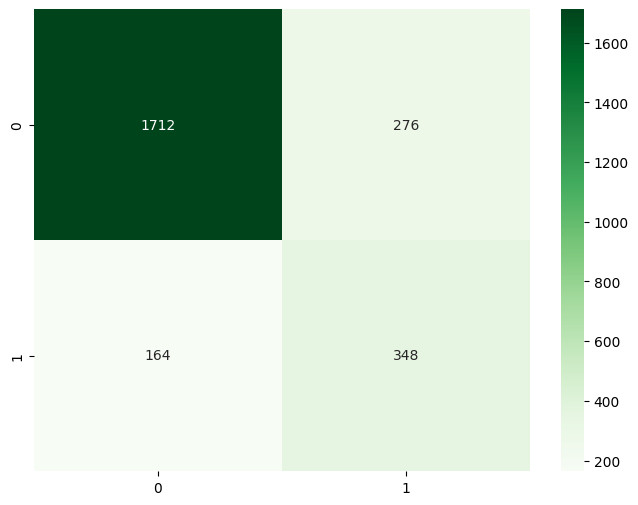

              precision    recall  f1-score   support

           0       0.91      0.86      0.89      1988
           1       0.56      0.68      0.61       512

    accuracy                           0.82      2500
   macro avg       0.74      0.77      0.75      2500
weighted avg       0.84      0.82      0.83      2500



In [ ]:
# Assuming y_true and y_pred are your true and predicted labels, respectively
# Compute confusion matrix
rf=RandomForestClassifier(class_weight='balanced',max_depth=8,max_features=0.2)
rf.fit(x_train,y_train)
conf_matrix = confusion_matrix(y_test, rf.predict(x_test))

# Plot confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Greens')
plt.show()

print(classification_report(y_test,rf.predict(x_test)))

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gb=GradientBoostingClassifier(random_state=56)

In [ ]:
params={'loss':['exponential','log-loss'],
        'warm_start':[True,False],
        'max_depth':[4,6,8,10],
        'n_estimators':[50,80,100]}
g_gb=GridSearchCV(gb,params,verbose=3,cv=3,return_train_score=True)
g_gb.fit(x_train,y_train)

Fitting 3 folds for each of 48 candidates, totalling 144 fits
[CV 1/3] END loss=exponential, max_depth=4, n_estimators=50, warm_start=True;, score=(train=0.873, test=0.861) total time=   0.8s
[CV 2/3] END loss=exponential, max_depth=4, n_estimators=50, warm_start=True;, score=(train=0.874, test=0.862) total time=   0.9s
[CV 3/3] END loss=exponential, max_depth=4, n_estimators=50, warm_start=True;, score=(train=0.875, test=0.859) total time=   0.9s
[CV 1/3] END loss=exponential, max_depth=4, n_estimators=50, warm_start=False;, score=(train=0.873, test=0.861) total time=   0.9s
[CV 2/3] END loss=exponential, max_depth=4, n_estimators=50, warm_start=False;, score=(train=0.874, test=0.862) total time=   0.8s
[CV 3/3] END loss=exponential, max_depth=4, n_estimators=50, warm_start=False;, score=(train=0.875, test=0.859) total time=   0.7s
[CV 1/3] END loss=exponential, max_depth=4, n_estimators=80, warm_start=True;, score=(train=0.879, test=0.859) total time=   0.9s
[CV 2/3] END loss=exponen

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
72 fits failed out of a total of 144.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
72 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py", line 420, in fit
    self._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 600, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_p

GridSearchCV(cv=3, estimator=GradientBoostingClassifier(random_state=56),
             param_grid={'loss': ['exponential', 'log-loss'],
                         'max_depth': [4, 6, 8, 10],
                         'n_estimators': [50, 80, 100],
                         'warm_start': [True, False]},
             return_train_score=True, verbose=3)

In [ ]:
pd.DataFrame(g_gb.cv_results_, columns=['params','mean_fit_time','mean_test_score','mean_train_score','rank_test_score']).sort_values(by='rank_test_score').set_index('params').head()

,mean_fit_time,mean_test_score,mean_train_score,rank_test_score
params,,,,
"{'loss': 'exponential', 'max_depth': 6, 'n_estimators': 100, 'warm_start': True}",1.929779,0.863733,0.927000,1
"{'loss': 'exponential', 'max_depth': 6, 'n_estimators': 100, 'warm_start': False}",1.681916,0.863733,0.927000,1
"{'loss': 'exponential', 'max_depth': 6, 'n_estimators': 50, 'warm_start': True}",0.935446,0.863067,0.900533,3
"{'loss': 'exponential', 'max_depth': 6, 'n_estimators': 50, 'warm_start': False}",1.010981,0.863067,0.900533,3
"{'loss': 'exponential', 'max_depth': 6, 'n_estimators': 80, 'warm_start': False}",1.353360,0.862667,0.917400,5


In [ ]:
g_gb.best_estimator_

GradientBoostingClassifier(loss='exponential', max_depth=6, random_state=56,
                           warm_start=True)

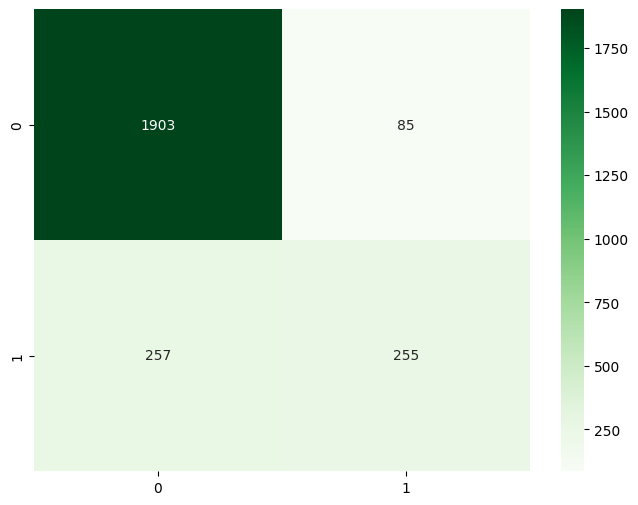

              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1988
           1       0.75      0.50      0.60       512

    accuracy                           0.86      2500
   macro avg       0.82      0.73      0.76      2500
weighted avg       0.85      0.86      0.85      2500



In [ ]:
gb=GradientBoostingClassifier(loss='exponential', max_depth=6, random_state=56,warm_start=True)
gb.fit(x_train,y_train)
conf_matrix = confusion_matrix(y_test, gb.predict(x_test))

# Plot confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Greens')
plt.show()

print(classification_report(y_test,gb.predict(x_test)))

In [ ]:
from xgboost import XGBClassifier
xgb=XGBClassifier()
params={'max_depth':[2,3,4]}
g_xgb=GridSearchCV(xgb,params,cv=3,verbose=3,return_train_score=True)
g_xgb.fit(x_train,y_train)

Fitting 3 folds for each of 3 candidates, totalling 9 fits
[CV 1/3] END ...max_depth=2;, score=(train=0.877, test=0.855) total time=   0.7s
[CV 2/3] END ...max_depth=2;, score=(train=0.875, test=0.863) total time=   3.3s
[CV 3/3] END ...max_depth=2;, score=(train=0.872, test=0.863) total time=   2.3s
[CV 1/3] END ...max_depth=3;, score=(train=0.897, test=0.858) total time=   1.9s
[CV 2/3] END ...max_depth=3;, score=(train=0.895, test=0.856) total time=   0.1s
[CV 3/3] END ...max_depth=3;, score=(train=0.894, test=0.862) total time=   0.1s
[CV 1/3] END ...max_depth=4;, score=(train=0.924, test=0.849) total time=   0.1s
[CV 2/3] END ...max_depth=4;, score=(train=0.924, test=0.850) total time=   0.1s
[CV 3/3] END ...max_depth=4;, score=(train=0.921, test=0.857) total time=   0.1s


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'max_depth': [2, 3, 4]}, return_train_score=True,
             verbose=3)

In [ ]:
pd.DataFrame(g_xgb.cv_results_, columns=['params','mean_fit_time','mean_test_score','mean_train_score','rank_test_score']).sort_values(by='rank_test_score').set_index('params').head()

,mean_fit_time,mean_test_score,mean_train_score,rank_test_score
params,,,,
{'max_depth': 2},2.050075,0.860133,0.874667,1
{'max_depth': 3},0.692315,0.858800,0.895333,2
{'max_depth': 4},0.099729,0.852133,0.922933,3


In [ ]:
g_xgb.best_estimator_

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=2, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

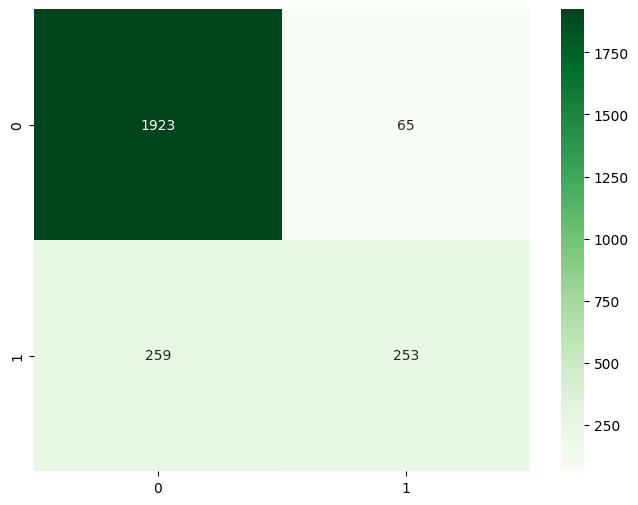

              precision    recall  f1-score   support

           0       0.88      0.97      0.92      1988
           1       0.80      0.49      0.61       512

    accuracy                           0.87      2500
   macro avg       0.84      0.73      0.77      2500
weighted avg       0.86      0.87      0.86      2500



In [ ]:
xgb=XGBClassifier(max_depth=2)
xgb.fit(x_train,y_train)
conf_matrix = confusion_matrix(y_test, xgb.predict(x_test))

# Plot confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Greens')
plt.show()

print(classification_report(y_test,xgb.predict(x_test)))

## GradientBoostingClassifier works best above all of them

